### Question 1

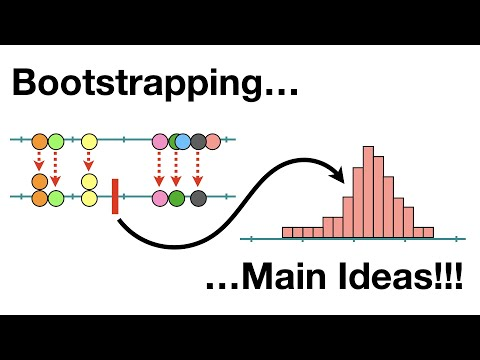

In [34]:
# "Bootstrapping Main Ideas" Video

from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Standard Error of the Mean = Standard Deviation of the distributed bootstrapped means.

The standard deviation of a dataset is the measure of the spread of datapoints from a mean in a sample.

The standard error of the mean measures how much the sample mean would vary if we took many samples from a population.

Given that the histogram in the video tells us how the mean might change if the experiment was done a bunch of times, the standard error of the mean value from the original data set IS THE standard deviation of the distribution of bootstrapped means. 95% confidence interval is interval that covers 95% of bootstrapped means.

Histogram tells us how the mean might shange if the experiment was done a bunch of times. If we want to know the Standard Error of the mean value from the original data set, then we only need to calculate the standard deviation of the distribution of bootstrapped means. 

<details class="details-example"><summary style="color:blue"><u>Personal Notes</u></summary>

> Bootstrapping 4 Steps:

1. Make a bootstrapped data set.
2. Calculate something (in video, mean was calculated).
3. Keep track of calculation.
4. Repeat steps multiple times.

Instead of calculating the mean, the median or standard deviation could have also been calculated.

### Question 2

95% confidence interval is interval that covers 95% of bootstrapped means.

Steps to creating a confidence interval using the Standard Deviation from the Mean:

1. Retrieve the sample mean from data.

Use the sample mean formula!

2. Retrieve the Standard Deviation from data.

Use the standard deviation formula!

3. Compute the Standard Error of the Mean by dividing the standard deviation by the square root of the sample size (n).

$Standard Error of the Mean = \frac{Standard Deviation}{\sqrt{n}}$

4. Generate boorstrapped sample mean.

Generate as many sample means as you can. This will create a distribution of bootstrapped means (similar to the one shown in the video).

5. (Option 1) Use formula that uses Z-Score to get confidence intervla.

$\left( \bar{x} - 1.96 \times \text{SEM}, \bar{x} + 1.96 \times \text{SEM} \right)$

For a confidence interval of 95%, the Z-Score is 1.96.

5. (Option 2) From the distribution, identify the values at the 2.5th and 97.5th percentiles.

These percentiles the lower and upper bounds of the confidence interval.  

These percentiles the lower and upper bounds of the confidence interval. 

7. Using the Z-Score derieved confidence interval formula, or using upper and lower bounds from percentiles (the same as quantiles but distribution divided into 100 equal parts) to generate the interval. 

You now have a confidence interval!

##### Link to ChatBot Session: https://chatgpt.com/share/66fd9309-c5d0-800f-983f-6d5a56efa727

##### Summary of ChatBot Session:
1. Using Standard Error of the Mean (SEM) to Create a 95% Confidence Interval:
You asked how to construct a 95% confidence interval that covers 95% of bootstrapped sample means using the standard error of the mean.
I explained the process, starting with calculating the sample mean, followed by the SEM, which is the standard deviation of the bootstrapped sample means. We then discussed using the Z-score of 1.96 for a 95% confidence interval and constructing the interval.
Additionally, we talked about an alternative method using the percentile method from bootstrapped sample means.
2. LaTeX Code for Confidence Interval:
You requested the LaTeX code for the confidence interval formula, which I provided as:
`\left( \bar{x} - 1.96 \times \text{SEM}, \bar{x} + 1.96 \times \text{SEM} \right)`.

### Question 3

Already answered in 5. (Option 2) of Question 2, where the process for retrieving the upper and lower bounds using quantiles was described.

Here is some code what the retrieval of upper and lower bounds using `np.quantile`.

In [35]:
# Just example code. Not meant to be run!

# lower_bound = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile
# upper_bound = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile

##### Link to ChatBot Session: https://chatgpt.com/share/66fd9500-e868-800f-b386-35075230aae1

##### Summary of ChatBot Session: 
1. Technical Questions:
You asked for code snippets to calculate a 95% confidence interval using np.quantile() on bootstrapped mean distributions, and I provided a Python code sample for this.

### Question 4

We begin by defining functions that can compute the bootstrap confidence intervals.

The following code passes `np.median` into the `stat_function` parameter. This generates a bootstrap confidence interval using medians. In order to compute the confidence interval for different statistics, this `stat_function` can passed a different argument.

In [36]:
import numpy as np

# Define a function to compute the bootstrap confidence interval for any statistic
def bootstrap_ci(sample, stat_function=np.median, n_bootstrap=1000, ci_percentile=95):
    """
    This function calculates a bootstrap confidence interval for a given statistic.
    
    Parameters:
    - sample: the data sample (array or list)
    - stat_function: the statistic function to compute (default is np.mean)
    - n_bootstrap: the number of bootstrap resamples to take (default is 1000)
    - ci_percentile: the confidence interval percentile (default is 95)
    
    Returns:
    - lower_bound: the lower bound of the confidence interval
    - upper_bound: the upper bound of the confidence interval
    """
    # Create a list to store the bootstrap resampled statistics
    bootstrap_statistics = []

    # Perform bootstrap resampling
    for _ in range(n_bootstrap):
        # Create a bootstrap sample by randomly sampling with replacement
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        # Calculate the statistic on the bootstrap sample and append it to the list
        bootstrap_stat = stat_function(bootstrap_sample)
        bootstrap_statistics.append(bootstrap_stat)

    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 - (100 - ci_percentile) / 2)

    return lower_bound, upper_bound

Here an example of what the confidence interval will look like for medians:

In [37]:
# Example usage with a sample dataset (replace this with your actual data)
sample_data = [12, 15, 14, 10, 13, 16, 14, 15, 13, 12]

# Calculate a 95% bootstrap confidence interval for the population median
ci_median = bootstrap_ci(sample_data)
print("95% CI for the population mean:", ci_median)

95% CI for the population mean: (12.0, 15.0)


And here is how changing the `stat_function` parameter to `np.mean` will generate the confidence intervals for means.

In [38]:
# To calculate a 95% bootstrap confidence interval for the population median, 
# you can just change the stat_function to np.median:
ci_mean = bootstrap_ci(sample_data, stat_function=np.mean)
print("95% CI for the population median:", ci_mean)

95% CI for the population median: (12.3, 14.4)


##### Link to ChatBot Session: https://chatgpt.com/share/66fd979f-1884-800f-babb-87cbb5639595

##### Summary of ChatBot Session: 

1. Bootstrap Confidence Interval for Population Mean:
We worked together to create Python code to compute a 95% bootstrap confidence interval for the population mean using a provided sample. The code included clear comments and explanations on how to modify it for different population parameters such as the median.
2. Code Explanation:
The code computes the bootstrap confidence interval by resampling the data with replacement, calculating the statistic of interest for each resample, and then determining the confidence interval based on percentiles.
I explained how you could modify the code to calculate the confidence interval for other parameters like the median by changing the stat_function parameter.
3. Adaptation for Other Population Parameters:
You can easily adapt the provided code to compute confidence intervals for other statistics such as the median, standard deviation, or others, by simply changing the statistic function (e.g., np.median, np.std).

### Question 5

*Personal Answer:*

I think that the distinction between the role of population paramter and sample statistic comes from the nature of what the 'population' and 'sample' represents in statistics. 

Population parameters are a fixed value that describes the entire population. This is a theoretical value that is unknown, and the aim of much of Statistics is to get a better understanding of this population.

On the other hand, a sample statistic is used to estimate the population parameter, just as how we rely on sampling to estimate the population's characteristics.

*ChatBot's Evaluation of Personal Answer:*

Your response is on the right track and highlights an important distinction between population parameters and sample statistics. However, there are a few areas where you could strengthen and clarify your explanation:

1. Clarify the role of the confidence interval: 
You could more explicitly link the need for distinguishing between the population parameter and the sample statistic to the construction of confidence intervals. The sample statistic is used to create an interval that is likely to contain the population parameter, which is not directly observable.

2. Be concise about uncertainty: 
You might want to emphasize that the sample statistic is an estimate and therefore subject to variability, which is why confidence intervals are necessary. This would show a deeper understanding of the concept.


"Confidence intervals are constructed around the sample statistic to account for sampling variability, giving a range of plausible values for the unknown population parameter."

##### Link to ChatBot Session: https://chatgpt.com/share/66fd9a09-7b90-800f-92e5-71425b5197b8

##### Summary of ChatBot Session: 
We discussed the distinction between population parameters and sample statistics in the context of confidence intervals. You provided an answer explaining how population parameters are fixed, theoretical values representing the entire population, while sample statistics are used to estimate these parameters through sampling. I evaluated your response and suggested clarifying the role of confidence intervals in accounting for the variability of sample statistics and emphasizing the relationship between the two concepts.

### Question 6

1. What is the process of bootstrapping?

Bootstrapping process a method used to estimate the sampling distribution of a statistic (such as the mean, median, or variance) by repeatedly resampling from the original dataset with "replacement".

Replacement refers to the process of selecting data points from the original dataset in such a way that each data point can be selected more than once. After a data point is chosen, it is "put back" into the dataset, allowing it to be potentially chosen again in future resamples.

Here is the process of bootstrapping as 4 concise steps:-

Step 1: Make a bootstrapped data set.

In [39]:
def bootstrap_sample(data):
    return np.random.choice(data, size=len(data), replace=True)

Step 2: Calculate something (in video, mean was calculated).

In [40]:
def calculate_mean(sample):
    return np.mean(sample)

Step 3: Keep track of calculation.

In [41]:
def bootstrap(data, num_iterations):
    means = []
    for _ in range(num_iterations):
        sample = bootstrap_sample(data)  # From Step 1
        mean = calculate_mean(sample)    # From Step 2
        means.append(mean)               
    return means

Step 4: Repeat steps multiple times.

In [42]:
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
bootstrapped_means = bootstrap(data, 1000)

# In this case, the process is repeated 1000 times!

2. What is the main purpose of bootstrapping?

The purpose of bootstrapping process is to estimate the sampling distribution of a statistic. Bootstrapping is typically done when...

A. the distribution of the population is unknown (which is almost always the case for real-world data).

B. the sample size is too small.

Bootstrapping is especially useful when running more experiments is not feasible (perhaps due to high costs, high time consumption, or inability to reproduce the experiment).

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

First, we would begin with the bootstrapping process. The statistic specified would be the mean.

In [43]:
# Step 1: Example data sample
data = np.array([2.5, 3.1, 2.8, 3.0, 3.6, 2.9, 3.2])  # your sample data
hypothesized_mean = 3.0  # your hypothesized population mean

# Step 2: Function to generate a bootstrapped sample
def bootstrap_sample(data):
    return np.random.choice(data, size=len(data), replace=True)

# Step 3: Function to calculate the mean of a bootstrapped sample
def calculate_mean(sample):
    return np.mean(sample)

# Step 4: Generate bootstrapped samples and calculate means
def bootstrap_means(data, num_iterations=1000):
    means = []
    for _ in range(num_iterations):
        sample = bootstrap_sample(data)
        mean = calculate_mean(sample)
        means.append(mean)
    return np.array(means)

We would then calculate the confidence intervals. For mean (as well as the examples above), we know that this is typically 95%.

In [44]:
bootstrapped_means = bootstrap_means(data)

lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

- If the hypothesized mean falls within this confidence interval, then we know that the guess is plausible.

- If the hypothesized mean DOES NOT fall within this confidence interval, then we know that the guess is not plausible (or at least less plausible).

In [45]:
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")
if lower_bound <= hypothesized_mean <= upper_bound:
    print(f"The hypothesized mean {hypothesized_mean} is plausible.")
else:
    print(f"The hypothesized mean {hypothesized_mean} is not plausible.")

95% Confidence Interval: [2.799642857142857, 3.2575]
The hypothesized mean 3.0 is plausible.


Here is a visualization of what the fitting of the hypothesized guess into the confidence intervals might look like:

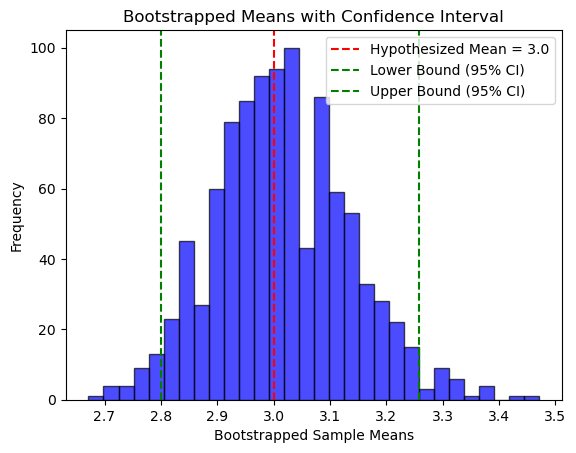

In [46]:
import matplotlib.pyplot as plt

plt.hist(bootstrapped_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(hypothesized_mean, color='red', linestyle='--', label=f'Hypothesized Mean = {hypothesized_mean}')
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound (95% CI)')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound (95% CI)')
plt.xlabel('Bootstrapped Sample Means')
plt.ylabel('Frequency')
plt.title('Bootstrapped Means with Confidence Interval')
plt.legend()
plt.show()

##### Link to ChatBot Session: https://chatgpt.com/share/66fdb4e6-74a0-800f-9f02-e20006164981

##### Summary of ChatBot Session: 

1. Bootstrapping Explanation and Code:
We discussed the bootstrapping process, including the four steps: creating bootstrapped samples, calculating statistics (mean), storing the results, and repeating the process multiple times. I provided you with a Python code example to implement this, focusing on resampling with replacement and calculating bootstrapped means.
2. Clarification of Concepts:
You asked about the meaning of "replacement" in bootstrapping, which I explained as resampling where each data point can be selected more than once.
We also covered the main purpose of bootstrapping, particularly its usefulness when the population distribution is unknown and when gathering additional data is costly or infeasible.
3. Hypothesis Testing Using Bootstrapping:
You inquired how to use bootstrapping to assess whether a hypothesized population mean is plausible given a sample. I outlined the process: generating bootstrapped samples, calculating the sample mean, building a bootstrapped distribution of means, and comparing the hypothesized mean to the confidence interval.
4. Example Code for Hypothesis Testing:
I provided Python code that calculates a 95% confidence interval from bootstrapped sample means and checks whether the hypothesized mean falls within that interval. The code also includes an optional visualization using a histogram to compare the hypothesized mean against the bootstrapped distribution.

### Question 7

We begin conducting research (and hypothesis testing) by making assumptions in the form of hypotheses:

1. Assume that the null hypothesis is 0 (no effect). 
2. Assume that the alternative hypothesis is NOT 0 (has effect).

We know from previous questions that the confidence interval provides a range of values within which the true population mean is likely to fall. This confidence interval is computed given  sample data. 

*Confidence Interval Including 0:*
If the confidence interval includes 0, we cannot say that the true population mean is different from zero. Because of this, we "fail to reject the null hypothesis". 

*Bigger Picture:*
If we fail to reject the null hypothesis, we cannot determine the results from the experiment. It means that we don't have enough evidence to prove an effect, AND we don't have enough evidence to suggest that there is no effect.

The sample mean alone is not enough to reject the null because it does not consider uncertainty and variability!

##### Link to ChatBot Session: https://chatgpt.com/share/66fdb8aa-a278-800f-8792-fe813f0a5b50

##### Summary of ChatBot Session: 

The focus was on understanding why a confidence interval overlapping zero leads to "failing to reject the null hypothesis." This occurs when the interval suggests that the true population mean could still be zero, meaning there's not enough evidence to conclude that something has an effect, even if the observed sample mean is not zero. We also discussed that rejecting the null hypothesis happens when the confidence interval does not include zero, implying sufficient evidence that something does have an effect.

### Question 8

Goal: To determine whether AliTech's new vaccine improves the health of individuals who take it.

Hypotheses:

Null Hypothesis: Vaccine does not significantly improve the health of individuals who take it.

*To see no significant improvement in health, we expect the general relationship between variables IntialHealthScore and FinalHealthScore is expected to be (InitialHealthScore >= FinalHealthScore).*

Alternate Hypothesis: Vaccine does significantly improve the health of individuals who take it (InitialHealthScore < FinalHealthScore).

*To see a significant improvement in health, the general relationship between variables IntialHealthScore and FinalHealthScore is expected to be (InitialHealthScore < FinalHealthScore).*

Parsing the Data:

In [47]:
import pandas as pd

data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file within the Jupyter environment
df.to_csv('vaccine_data.csv', index=False)

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84


Bootstrapping Process:

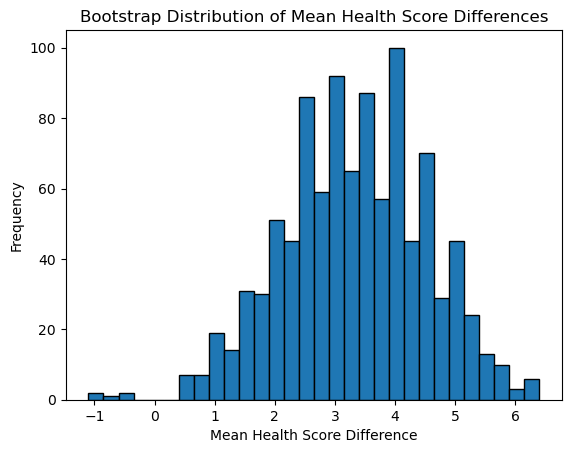

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility. I have chosen 53.
np.random.seed(53)

# Calculate difference between initial and final health scores
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping process
n_iterations = 1000
bootstrap_means = []

for i in range(n_iterations):
    sample = df['HealthScoreDiff'].sample(frac=1, replace=True)
    bootstrap_means.append(sample.mean())

# Visualizing the bootstrap distribution
plt.hist(bootstrap_means, bins=30, edgecolor='k')
plt.title("Bootstrap Distribution of Mean Health Score Differences")
plt.xlabel("Mean Health Score Difference")
plt.ylabel("Frequency")
plt.show()

Analysis Using Mean and Confidence Intervals:

In [51]:
mean_diff = np.mean(bootstrap_means)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print(f"Mean Health Score Difference: {mean_diff}")
print(f"95% Confidence Interval: [{ci_lower}, {ci_upper}]")

Mean Health Score Difference: 3.308
95% Confidence Interval: [0.9975000000000002, 5.6]


Conclusion:



Given that the Mean Health Score Difference is a positive number 3.308 (indicating that (InitialHealthScore < FinalHealthScore) and the 95% confidence interval is \[0.9975000000000002, 5.6\],indicating that 0 is not included in the interval...

...we can reject the null hypothesis!

**This means that the vaccine significantly improves the health of individuals who take it.**

##### Link to ChatBot Session: https://chatgpt.com/share/66fdc0f1-edb0-800f-a69d-944ff7b5f2ab

##### Summary of ChatBot Session: 
1. Data Setup:
You provided a dataset containing patient ID, age, gender, initial health score, and final health score.
I guided you in creating and loading this data into a CSV file using pandas and analyzing it in JupyterHub.
2. Data Analysis:
I explained how to calculate the difference between the initial and final health scores to evaluate the effectiveness of the vaccine.
We used bootstrapping to generate a distribution of sample means for the health score differences.
3. Bootstrapping Process:
You ran a bootstrapping process with 1000 iterations to resample the data, calculating the mean health score difference for each iteration.
4. Results:
You obtained a mean health score difference of 3.308, and a 95% confidence interval of \[0.997, 5.6\].
5. Conclusion:
Since the confidence interval does not contain 0, you rejected the null hypothesis, concluding that the vaccine has a significant positive effect on patients' health scores.
The true effect of the vaccine is likely an improvement in health scores ranging between 0.997 and 5.6 points.

### Question 9

In [ ]:
print(Yes!)

All summaries were retrieved with: "Please provide a summary of our exchanges here so I can submit them as a record of our interactions as part of a homework assignment" ^_^